In [2]:
import pandas as pd

In [8]:
ppp = pd.read_csv("../data/USA/usa_ppp.csv")
ppp.drop(columns = "Unnamed: 0", inplace = True)
ppp

,Text
0,Community Banks empower small businesses &amp;...
1,Apply for SBA Paycheck Protection Program - Sm...
2,April is here! Join us on Daybreak for your to...
3,The Paycheck Protection Program Loan has been ...
4,"“The Paycheck Protection Program, which has be..."
...,...
1477,@DrewOnTheRadio @TheJohnSenning as an asset pr...
1478,@NPR If they aren’t able to work because of th...
1479,"@biggsag @Brian_Riedl I dunno. If so, my next ..."
1480,@SpeakerPelosi @SenSchumer One really good way...


In [9]:
ny_ppp = pd.read_csv("../data/USA/ny_ppp.csv")
ny_ppp.drop(columns = "Unnamed: 0", inplace = True)
ny_ppp

,Text
0,@SimpleJack206 @gimurtha @CamBlurn @DerenicByr...
1,he helped businesses access $325 million in Pa...
2,New York Paycheck Protection Program (PPP) Loa...
3,Important update about the Paycheck Protection...
4,Marjorie Taylor Greene's company \nTaylor Comm...
...,...
1055,@JonathanMerritt It’s not necessary to condemn...
1056,"I hope, for Karma's sake, that it used protect..."
1057,@NPR If they aren’t able to work because of th...
1058,"@biggsag @Brian_Riedl I dunno. If so, my next ..."


In [11]:
california_ppp = pd.read_csv("../data/USA/california_ppp.csv")
california_ppp.drop(columns = "Unnamed: 0", inplace = True)
california_ppp

,Text
0,"@RadioFreeTom So let us guess, you must theref..."
1,@5_2blue @GregAbbott_TX Thx. I was 18 weeks a...
2,@SimpleJack206 @gimurtha @CamBlurn @DerenicByr...
3,he helped businesses access $325 million in Pa...
4,New York Paycheck Protection Program (PPP) Loa...
...,...
1313,"I hope, for Karma's sake, that it used protect..."
1314,@DrewOnTheRadio @TheJohnSenning as an asset pr...
1315,@NPR If they aren’t able to work because of th...
1316,"@biggsag @Brian_Riedl I dunno. If so, my next ..."


In [12]:
frames = [ppp, ny_ppp, california_ppp]

result = pd.concat(frames)

In [13]:
result

,Text
0,Community Banks empower small businesses &amp;...
1,Apply for SBA Paycheck Protection Program - Sm...
2,April is here! Join us on Daybreak for your to...
3,The Paycheck Protection Program Loan has been ...
4,"“The Paycheck Protection Program, which has be..."
...,...
1313,"I hope, for Karma's sake, that it used protect..."
1314,@DrewOnTheRadio @TheJohnSenning as an asset pr...
1315,@NPR If they aren’t able to work because of th...
1316,"@biggsag @Brian_Riedl I dunno. If so, my next ..."


In [14]:
tweet_text_list = result['Text'].tolist()

tweet_text_list

['Community Banks empower small businesses &amp; were the predominant Paycheck Protection Program lenders. Peoples Bank is proud to have helped retain about 7,000 local jobs through PPP lending.\n\nMember FDIC | Equal Housing Lender | #WhereValuesMatter | #supportlocal | #banklocally https://t.co/8IAN2IWT4G',
 'Apply for SBA Paycheck Protection Program - Small Business Loans | Womply https://t.co/Bp9gh6LV5W',
 'April is here! Join us on Daybreak for your top stories:\n🔒A company shuts down leaving people w/o jobs &amp; their final paychecks \n🏟Baseball fans are getting back into stadiums &amp; one team has 0 restrictions \n💰Protection from scammers-how a new law will make it harder for thieves https://t.co/KADPjzka3N',
 'The Paycheck Protection Program Loan has been extended. #PPP \nhttps://t.co/mGDR0KOX6h',
 '“The Paycheck Protection Program, which has been a lifeline for small businesses, is extended through May.... The American Rescue Plan also provides $10 billion to expand rural b

In [15]:
import numpy as np
import re

In [16]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "curfew", "curfews", "vaccine", "vaccines","vaccinated","vaccination", "weekend", "lockdown", "day", "night", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [17]:
cleaned_tweets = [clean_tweet(tw) for tw in tweet_text_list]
cleaned_tweets

<ipython-input-16-3325f21daabe>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['community banks empower small businesses were predominant paycheck protection program lenders peoples bank is proud have helped retain about 7 000 local jobs through ppp lending member fdic equal housing lender',
 'apply sba paycheck protection program small business loans womply',
 'april is here join us daybreak your top stories company shuts down leaving people w o jobs their final paychecks baseball fans are getting back into stadiums one team has 0 restrictions protection scammers how new law make it harder thieves',
 'paycheck protection program loan has been extended',
 'paycheck protection program which has been lifeline small businesses is extended through may american rescue plan also provides 10 billion expand rural broadband 130 billion help schools reopen safely',
 'while paycheck protection program has been subject fraud revelations contained new report by inspector general small business admin',
 'provided funding businesses at properties owned by trump organization so

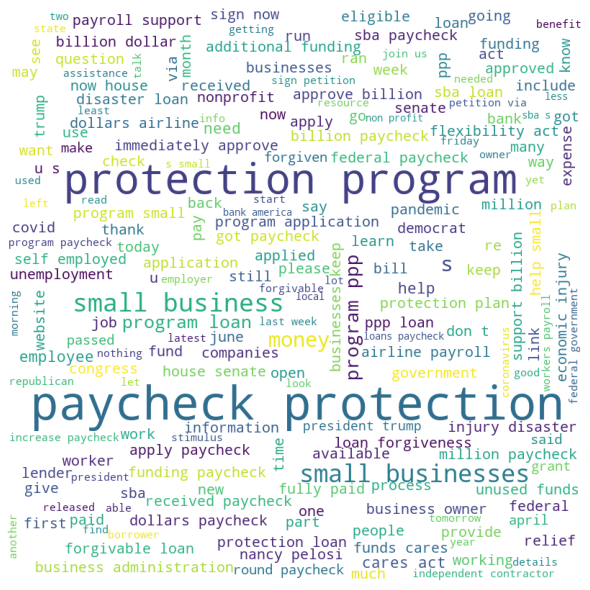

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()